<a href="https://colab.research.google.com/github/duchuykg/DATH_TTNT/blob/main/FaceMaskDetection_Lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from PIL import Image
import cv2
import numpy as np
import pandas as pd
from time import time
import os

In [ ]:
DIRECTORY = r"/content/drive/MyDrive/Do_an_AI/Dataset1/Dataset1"
CATEGORIES = ["WithMask", "WithoutMask"]
data = []

img_size = 32
BATCH_SIZE = 32;

In [ ]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    class_num = CATEGORIES.index(category) 
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image_array = cv2.resize(image,(img_size,img_size))
        
        data.append([image_array,class_num])

In [ ]:
print(len(data))

11792


In [ ]:
images = []
labels = []
for image, label in data:
    images.append(image)
    labels.append(label)

images = np.array(images, dtype="float32").reshape(-1, img_size, img_size, 1)
images = images / 255.0;
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
images.shape

(11792, 32, 32, 1)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(images, labels, test_size=0.20, stratify=labels, random_state=10)

(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)

In [ ]:
trainX.shape

(7074, 32, 32, 1)

In [ ]:
trainY.shape

(7074, 2)

In [ ]:
valX.shape

(2359, 32, 32, 1)

In [ ]:
testX.shape

(2359, 32, 32, 1)

In [ ]:
encode = {0: 'WithMask', 1: 'WithoutMask'}

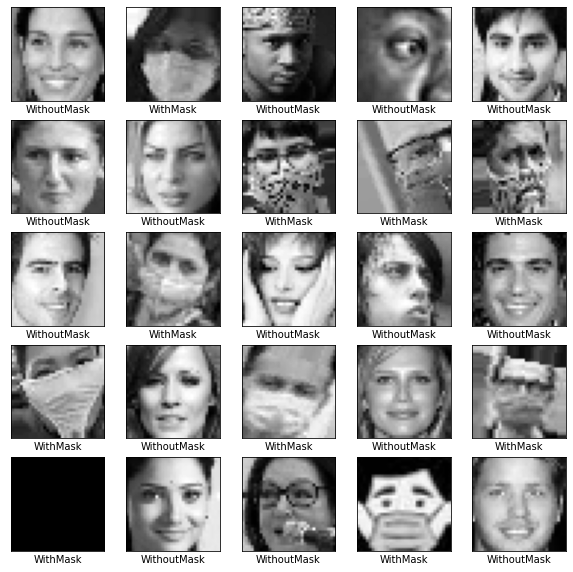

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    image = trainX[i].reshape(img_size, img_size)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image , cmap='gray')
    plt.xlabel(encode[int(trainY[i][[1]])])

plt.show()

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    min_delta = 0,
    mode = "auto",
    patience = 4,
    restore_best_weights = False,
)

In [ ]:
lr=2e-4
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
start = time()
history= model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=50, verbose=1, callbacks=[callback], validation_data=(valX, valY))
print(time()-start)

Epoch 1/50
222/222 [==============================] - 9s 37ms/step - loss: 0.5491 - accuracy: 0.7611 - val_loss: 0.3637 - val_accuracy: 0.8741
Epoch 2/50
222/222 [==============================] - 6s 27ms/step - loss: 0.2781 - accuracy: 0.8899 - val_loss: 0.2206 - val_accuracy: 0.9169
Epoch 3/50
222/222 [==============================] - 6s 27ms/step - loss: 0.1849 - accuracy: 0.9283 - val_loss: 0.1802 - val_accuracy: 0.9334
Epoch 4/50
222/222 [==============================] - 6s 28ms/step - loss: 0.1463 - accuracy: 0.9460 - val_loss: 0.1511 - val_accuracy: 0.9440
Epoch 5/50
222/222 [==============================] - 6s 27ms/step - loss: 0.1266 - accuracy: 0.9511 - val_loss: 0.1367 - val_accuracy: 0.9466
Epoch 6/50
222/222 [==============================] - 6s 28ms/step - loss: 0.1077 - accuracy: 0.9606 - val_loss: 0.1358 - val_accuracy: 0.9436
Epoch 7/50
222/222 [==============================] - 6s 28ms/step - loss: 0.1021 - accuracy: 0.9594 - val_loss: 0.1348 - val_accuracy: 0.9474

Text(0.5, 0, 'Epoch')

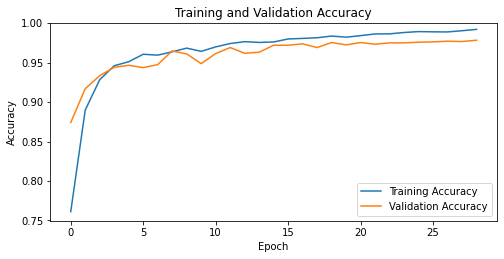

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

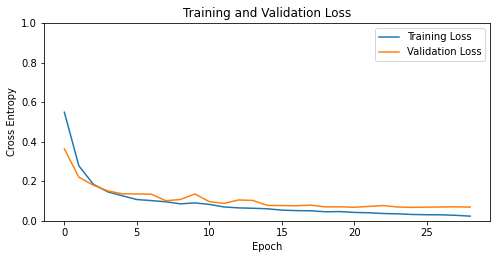

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
score =  model.evaluate(valX, valY, verbose=0)
print('Val accuracy', score[1])

Val accuracy 0.9783806800842285


In [ ]:
model.save("/content/drive/MyDrive/Do_an_AI/lenet5.model", save_format="h5")

In [ ]:
results = model.predict(testX)
predicted_test_labels = np.argmax(results ,axis = 1)
print(predicted_test_labels)

74/74 [==============================] - 1s 11ms/step
[0 1 1 ... 0 1 0]


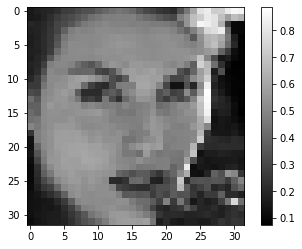

WithoutMask


In [ ]:
image = testX[2]
image = image.reshape(img_size, img_size)
plt.figure()
plt.imshow(image , cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

print(encode[predicted_test_labels[2]])

In [ ]:
 test_labels = np.argmax(testY, axis = 1)

In [ ]:
print(test_labels)

[0 1 1 ... 0 1 0]


In [ ]:
fail = []
for i in range (test_labels.size):
    if test_labels[i] != predicted_test_labels[i]:
        fail.append(i);

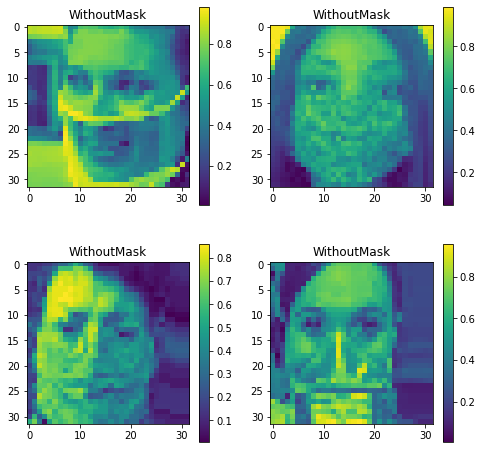

In [ ]:
plt.figure(figsize=(8,8))
value= [fail[1],fail[2],fail[3],fail[4]]
for n in value:
    plt.subplot(2,2,value.index(n)+1)
    image = testX[n].reshape(32, 32)
    plt.imshow(image)
    plt.colorbar()
    plt.title(encode[predicted_test_labels[n]])

plt.show()


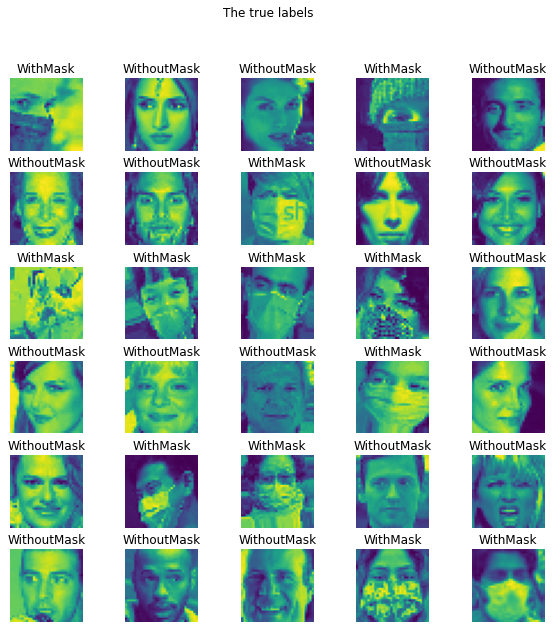

In [ ]:
plt.figure(figsize=(10,10))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)

    image = testX[n].reshape(img_size, img_size)
    plt.imshow(image)
    plt.title(encode[test_labels[n]])
    plt.axis('off')
_ = plt.suptitle("The true labels")


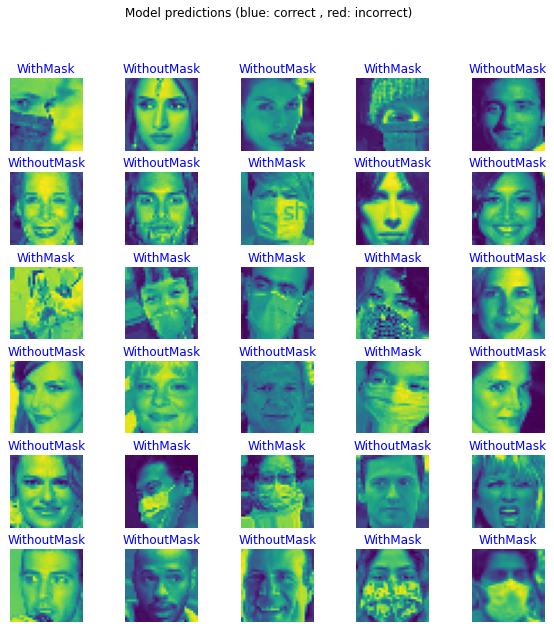

In [ ]:
plt.figure(figsize=(10,10))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)

    image = testX[n].reshape(img_size, img_size)
    plt.imshow(image)
    color = "blue" if predicted_test_labels[n] == test_labels[n] else "red"
    plt.title(encode[predicted_test_labels[n]], color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct , red: incorrect)")


In [ ]:
loss, acc = model.evaluate(testX , testY)
print("Model accuracy: {:5.2f}%".format(100*acc))

74/74 [==============================] - 1s 12ms/step - loss: 0.0819 - accuracy: 0.9729
Model accuracy: 97.29%
